In [ ]:
import re
import nltk
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
import seaborn as sn
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('punkt')
stemmer=PorterStemmer()

nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: ignored

In [ ]:
import re
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import seaborn as sns

In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Hate And aggression Detection/agr_en_train.csv')
df.head()


,Comments,level
0,Well said sonu..you have courage to stand agai...,2
1,"Most of Private Banks ATM's Like HDFC, ICICI e...",0
2,"Now question is, Pakistan will adhere to this?",2
3,Pakistan is comprised of fake muslims who does...,2
4,"??we r against cow slaughter,so of course it w...",0


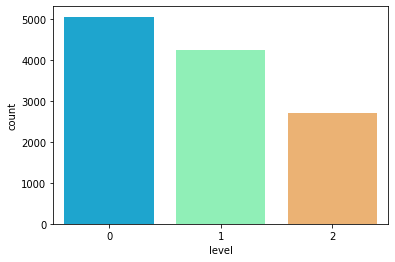

In [ ]:
sns.countplot(x = 'level', data = df, palette = 'rainbow')

In [ ]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [ ]:
countdf = df['level'].value_counts()
countdf.reset_index().head()

,index,level
0,0,5052
1,1,4240
2,2,2708


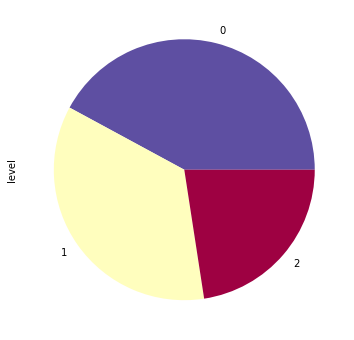

In [ ]:
countdf.plot(kind='pie', colormap='Spectral_r', figsize=(6, 6))

In [ ]:

plt.savefig('pie.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
pip freeze > requirements.txt

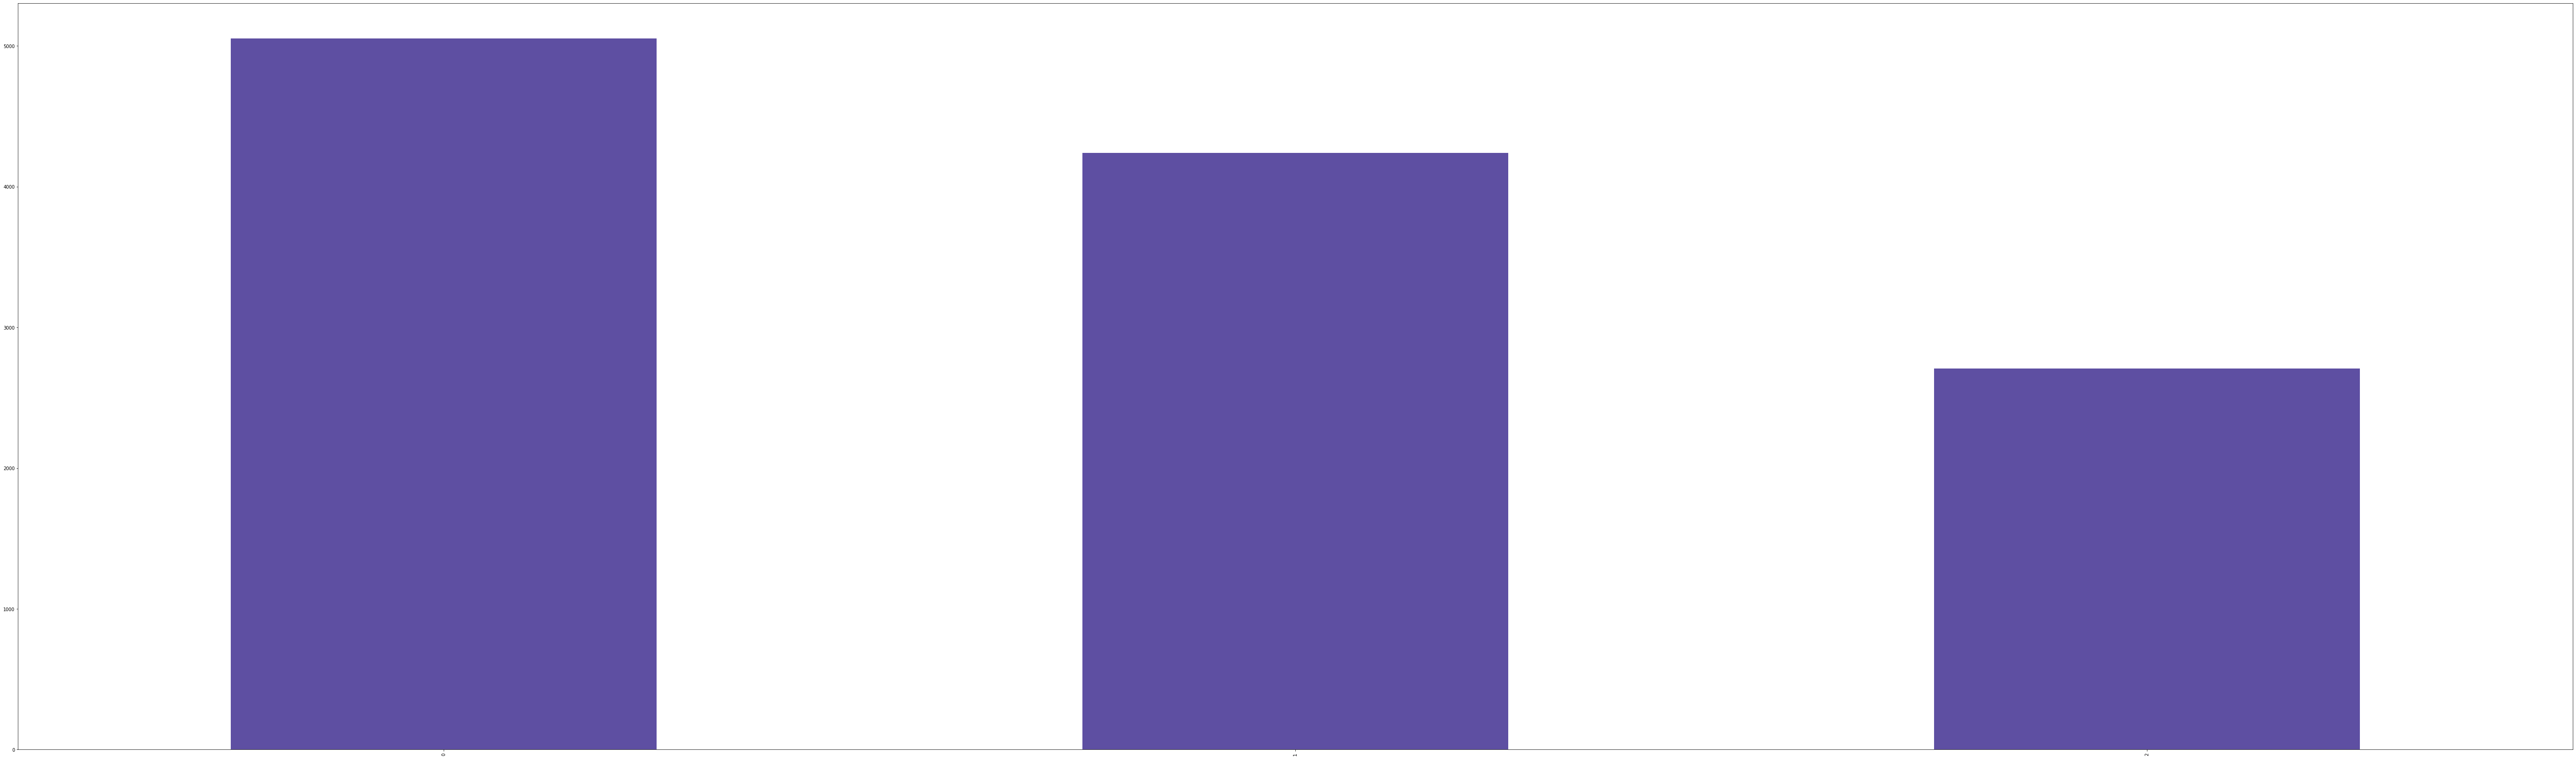

In [ ]:
countdf.plot(kind='bar', colormap='Spectral_r', figsize=(100, 30))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'level'), Text(0.5, 0, 'Count')]

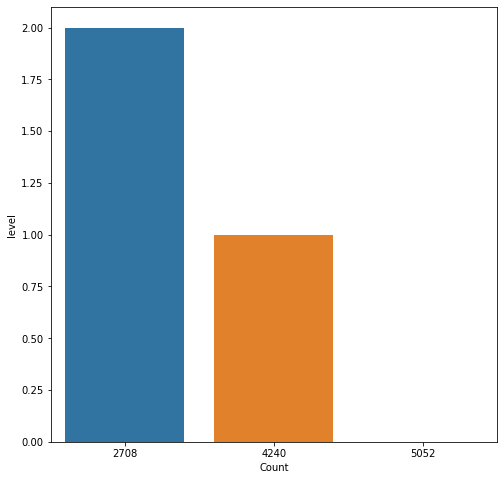

In [ ]:

labels = df['level'].value_counts().index
val = df['level'].value_counts().values

plt.figure(figsize = (8,8))
ax = sns.barplot(val,labels)
ax.set(xlabel = 'Count',ylabel = 'level')

In [ ]:
import sklearn.model_selection
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

#The casing of product titles is clearly all over the place. It will help us reduce the vocabulary size to lowercase them all.
df['Comments'] = df['Comments'].str.lower()
df.head()

,Comments,level
0,well said sonu..you have courage to stand agai...,2
1,"most of private banks atm's like hdfc, icici e...",0
2,"now question is, pakistan will adhere to this?",2
3,pakistan is comprised of fake muslims who does...,2
4,"??we r against cow slaughter,so of course it w...",0


In [ ]:
df['Comments'] = df['Comments'].str.lower()
df.head()

,Comments,level
0,well said sonu..you have courage to stand agai...,2
1,"most of private banks atm's like hdfc, icici e...",0
2,"now question is, pakistan will adhere to this?",2
3,pakistan is comprised of fake muslims who does...,2
4,"??we r against cow slaughter,so of course it w...",0


In [ ]:

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#fucntion to remove stop words
def remove_stopwords(text):
    textArr = text.split(' ')
    textArr=list(set(textArr))
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

#remove stopwords from text
df['Comments'] = df['Comments'].apply(remove_stopwords)
df.head()

,Comments,level
0,courage said sonu..you dadagiri well muslims s...,2
1,private sector atm banks like etc public icici...,0
2,"adhere this? pakistan is, question",2
3,fake comprised gathered rascals muslims know ...,2
4,"happens. course slaughter,so ??we stop leather...",0


In [ ]:

import string
def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

df['Comments'] = df['Comments'].apply(clean_text)
df.head()

,Comments,level
0,courage said sonuyou dadagiri well muslims stand,2
1,private sector banks like public icici banks w...,0
2,adhere this pakistan question,2
3,fake comprised gathered rascals muslims know i...,2
4,happens course slaughterso stop leather manufa...,0


In [ ]:

!pip install spacy

In [ ]:

import spacy
nlp = spacy.load('en',disable=['parser','ner'])

def lemmatization(texts,allowed_postags=['NOUN']):
    output = []
    for sent in texts:
        doc = nlp(sent)
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return output

In [ ]:

desc_list = df['Comments'].tolist()
print(desc_list[0])

courage said sonuyou dadagiri well muslims stand


In [ ]:
df1 = df.copy()
df1['length'] = df['Comments'].apply(lambda x: len(x))
df1.head()

,Comments,level,length
0,courage said sonuyou dadagiri well muslims stand,2,48
1,private sector banks like public icici banks w...,0,67
2,adhere this pakistan question,2,29
3,fake comprised gathered rascals muslims know i...,2,100
4,happens course slaughterso stop leather manufa...,0,53


In [ ]:
grp = df1.groupby(['level'])['length'].mean().reset_index()

In [ ]:
grp.head()

,level,length
0,0,73.348377
1,1,82.848113
2,2,96.634047


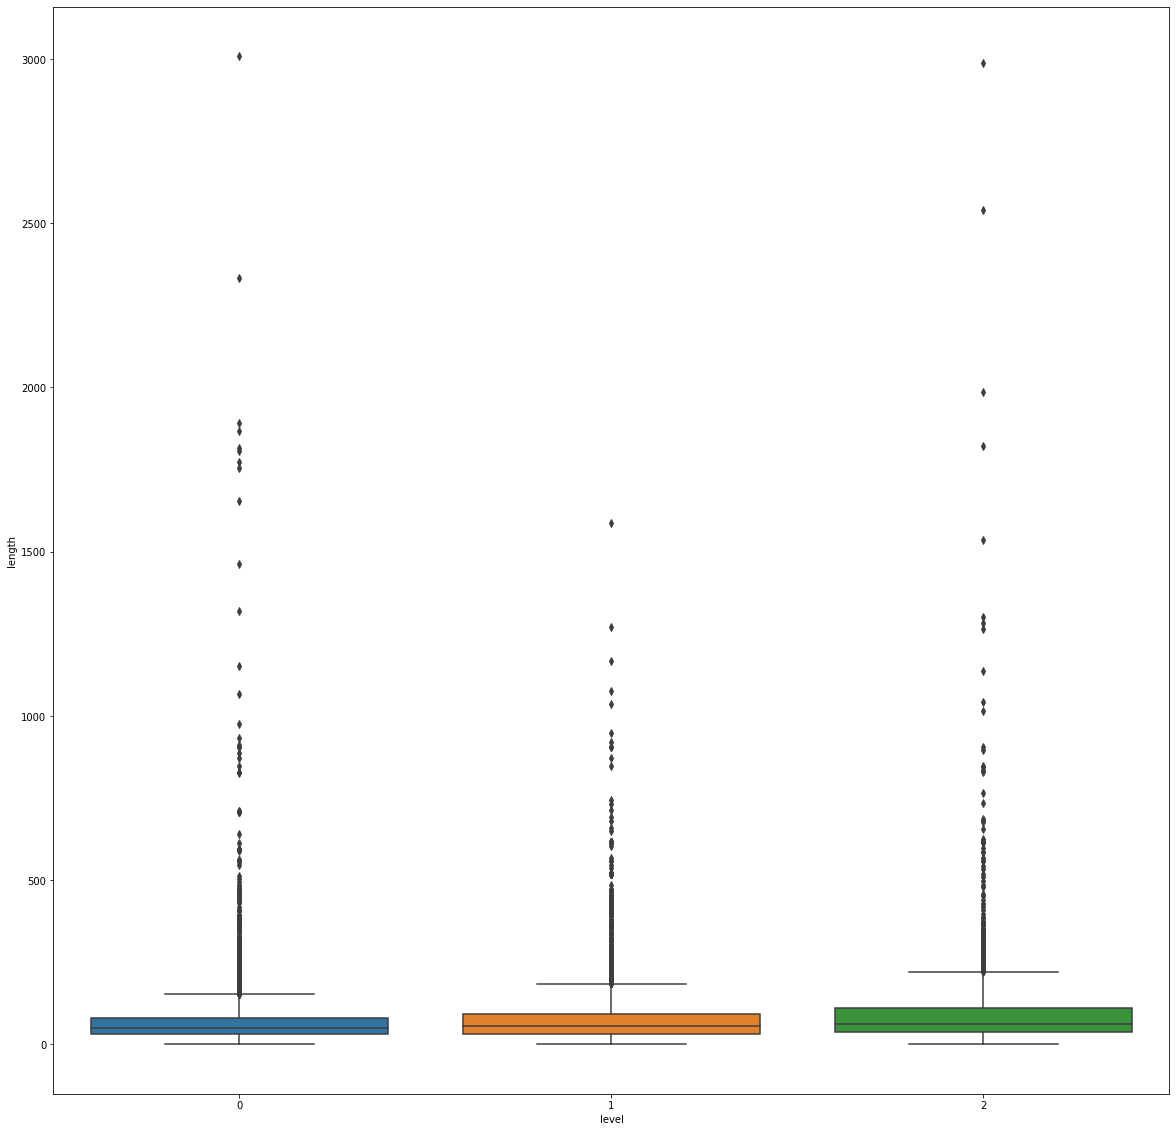

In [ ]:
ax = plt.figure(figsize = (20,20))
sns.boxplot(x = "level", y = "length", data = df1 )

In [ ]:

plt.savefig('lengthboxplot.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
pip freeze > requirements.txt

In [ ]:
df.head()

,Comments,level
0,courage said sonuyou dadagiri well muslims stand,2
1,private sector banks like public icici banks w...,0
2,adhere this pakistan question,2
3,fake comprised gathered rascals muslims know i...,2
4,happens course slaughterso stop leather manufa...,0


In [ ]:
df.to_excel(r'C:\Users\Shatakshi\Desktop\Hate Detection\cleaned_datasets\cleaned_agr_en_train.xlsx')

**LOW RESOURCE MODELS**

 *Random Forests*

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import pickle

In [ ]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(df['Comments'].values.astype('U'))
final_features.shape

(12000, 8496)

In [ ]:
#first we split our dataset into testing and training set:
# this block is to split the dataset into training and testing set 
X = df['Comments']
Y = df['level']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
# instead of doing these steps one at a time, we can use a pipeline to complete them all at once
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1000)),
                     ('clf', RandomForestClassifier())])
# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train.values.astype('U'), y_train.values.astype('U'))
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(model, f)
ytest = np.array(y_test)


In [ ]:
print(classification_report(ytest, model.predict(X_test.values.astype('str'))))
print(confusion_matrix(ytest, model.predict(X_test.values.astype('str'))))

ValueError: ignored